C:\Users\Nelson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
7939/7939 [==============================] - 33s 4ms/step - loss: 0.0156
Epoch 2/100
7939/7939 [==============================] - 28s 3ms/step - loss: 0.0026
Epoch 3/100
7939/7939 [==============================] - 28s 4ms/step - loss: 0.0025
Epoch 4/100
7939/7939 [==============================] - 28s 4ms/step - loss: 0.0022
Epoch 5/100
7939/7939 [==============================] - 28s 4ms/step - loss: 0.0022
Epoch 6/100
7939/7939 [==============================] - 28s 4ms/step - loss: 0.0026
Epoch 7/100
7939/7939 [==============================] - 28s 4ms/step - loss: 0.0019
Epoch 8/100
7939/7939 [==============================] - 29s 4ms/step - loss: 0.0017
Epoch 9/100
7939/7939 [==============================] - 29s 4ms/step - loss: 0.0017
Epoch 10/100
7939/7939 [==============================] - 29s 4ms/step - loss: 0.0016
Epoch 11/100
7939/7939 [==============================] - 29s 4ms/step - loss: 0.0016
Epoch 12/100
7939/7939 [==============================] - 29s 4

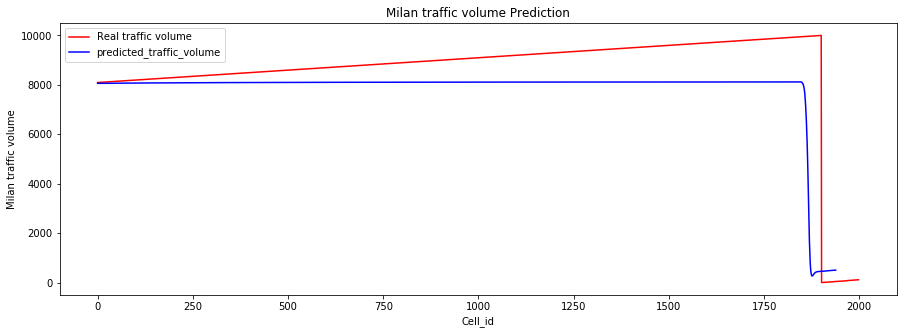

In [6]:

# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('C:\\Users\\Nelson\\Desktop\\milan csv\\milan cellid and internet.csv')
training_set = dataset_train.iloc[:8000, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 7999):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 64)



# Part 3 - Making the predictions and visualising the results

# Getting the real data traffic
dataset_test = pd.read_csv('C:\\Users\\Nelson\\Desktop\\milan csv\\milan cellid and internet.csv')
real_traffic_volume = dataset_test.iloc[8001:10000, 1:2].values

# Getting the predicted data traffic

inputs = real_traffic_volume 
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1999):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_traffic_volume = regressor.predict(X_test)
predicted_traffic_volume = sc.inverse_transform(predicted_traffic_volume)

# Visualising the results
plt.figure(figsize = (15, 5) )
plt.plot(real_traffic_volume, color = 'red', label = 'Real traffic volume')
plt.plot(predicted_traffic_volume, color = 'blue', label = 'predicted_traffic_volume')
plt.title('Milan traffic volume Prediction')
plt.xlabel('Cell_id')
plt.ylabel('Milan traffic volume')
plt.legend()
plt.show()
